In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("tinder_google_play_reviews.csv")
print(data.head())

                               reviewId           userName  \
0  caf51b90-eb4e-4401-b40d-0b5eeb9dc4dd           Lefty Mc   
1  cd500370-4226-455f-bced-85d31d52447f     favour martins   
2  fbe81eed-120d-42d7-a6e4-10f4bd23650b    Tegan Eaglesham   
3  d72b227b-b839-4fba-8fb5-9b051d44bb45  Christopher Fitts   
4  1b80e66b-38bc-46c4-89e3-ead3b8191f8c        Monu Mishra   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AFdZu...   
1  https://play-lh.googleusercontent.com/a/AItbvm...   
2  https://play-lh.googleusercontent.com/a-/AFdZu...   
3  https://play-lh.googleusercontent.com/a/AItbvm...   
4  https://play-lh.googleusercontent.com/a/AItbvm...   

                                             content  score  thumbsUpCount  \
0  Continually shows people outside your search r...    1.0            1.0   
1                       This app deserves zero stars    1.0            0.0   
2  Its pretty good but u can get a lot of people ...    

In [6]:
data = data[["content"]]

In [7]:
data.isnull().sum()

content    27
dtype: int64

In [8]:
data = data.dropna()

In [9]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


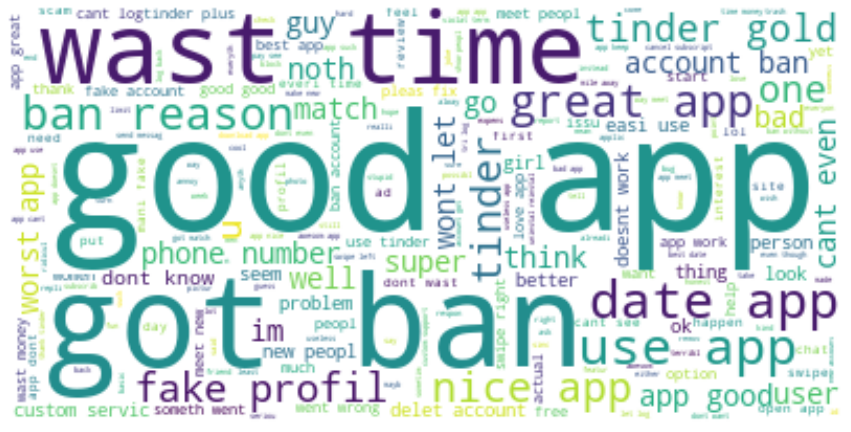

In [10]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                             content  Positive  Negative  \
0  continu show peopl outsid search rang boost no...     0.246       0.0   
1                               app deserv zero star     0.000       0.0   
2      pretti good u get lot peopl catfish awar time     0.293       0.0   
3                                      best app date     0.677       0.0   
4                           mind blow ap fr frndship     0.000       0.0   

   Neutral  
0    0.754  
1    1.000  
2    0.707  
3    0.323  
4    1.000  


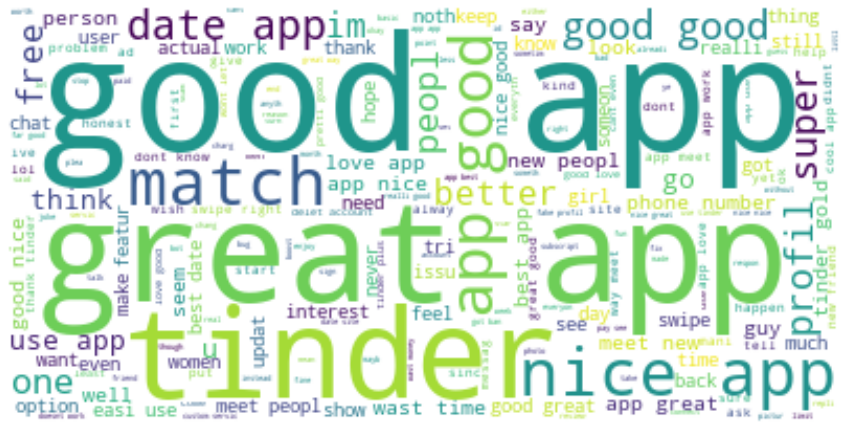

In [12]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

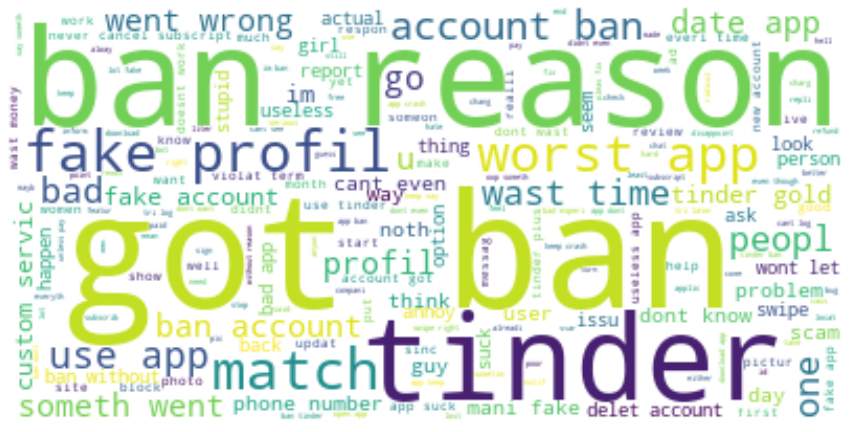

In [13]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive ")
    elif (b>a) and (b>c):
        print("Negative ")
    else:
        print("Neutral  ")
sentiment_score(x, y, z)

Neutral  


In [15]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  106491.58700001266
Negative:  43036.39999999921
Neutral:  202977.98300000158
